# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.147786e+01     6.849585e+00
 * time: 0.002368927001953125
     1     3.013780e+01     5.881601e+00
 * time: 0.009068965911865234
     2     2.061612e+01     5.533297e+00
 * time: 0.016914844512939453
     3     1.693388e+01     6.013161e+00
 * time: 0.024101972579956055
     4     1.058932e+01     2.305847e+00
 * time: 0.030525922775268555
     5     1.049195e+01     3.849695e+00
 * time: 0.036296844482421875
     6     9.629701e+00     2.016481e+00
 * time: 0.04164695739746094
     7     9.050826e+00     1.395610e+00
 * time: 0.04777979850769043
     8     8.777027e+00     1.851855e+00
 * time: 0.053344011306762695
     9     8.494661e+00     1.697185e+00
 * time: 0.05938887596130371
    10     8.259978e+00     1.053877e+00
 * time: 0.0653388500213623
    11     8.105280e+00     7.422043e-01
 * time: 0.11268901824951172
    12     7.988631e+00     6.079515e-01
 * time: 0.11660385131835938
    13     7.972780e+00     6.544017e-01
 *

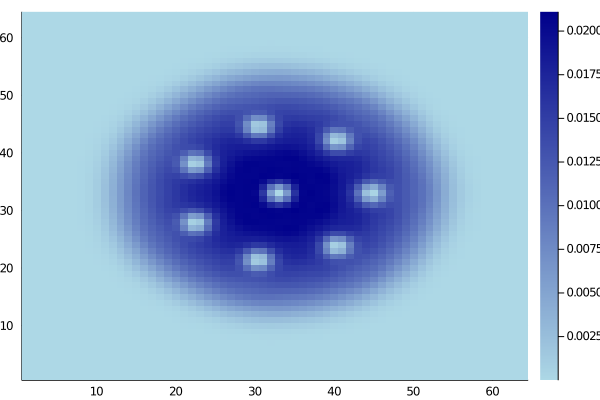

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)